In [1]:
import os
import pandas as pd
import logging
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# Set up logging
logging.basicConfig(level=logging.INFO)

In [2]:
def extract_date_from_filename(file_name):
    """
    Extracts a date from the file name using a predefined format.
    Args:
    file_name (str): The name of the file.
    Returns:
    datetime: The extracted date.
    """
    date_str = file_name.split('_')[-1].split('.')[0]
    return datetime.strptime(date_str, '%Y%m%d')

def load_file(full_file_path):
    """
    Loads a file into a DataFrame based on its extension.
    Args:
    full_file_path (str): Full path to the file.
    Returns:
    DataFrame: Loaded data or None if the file format is not supported.
    """
    file_extension = os.path.splitext(full_file_path)[1]
    if file_extension == '.parquet':
        return pd.read_parquet(full_file_path)
    return None

def load_and_process_files(folder_path):
    """
    Loads and processes files from a given folder.
    Args:
    folder_path (str): Path to the folder containing files.
    Returns:
    DataFrame: Concatenated DataFrame of all processed files.
    List[str]: List of files that failed to load.
    """
    file_list = os.listdir(folder_path)
    dataframes, failed_to_load = [], []

    for file in file_list:
        full_file_path = os.path.join(folder_path, file)
        try:
            df = load_file(full_file_path)
            if df is not None:
                df['date'] = extract_date_from_filename(file)
                dataframes.append(df)
        except Exception as e:
            logging.error(f"Failed to load file {file}. Error: {e}")
            failed_to_load.append(file)

    if failed_to_load:
        logging.info("The following files failed to load: %s", failed_to_load)
    else:
        logging.info("All files loaded successfully.")

    return pd.concat(dataframes, ignore_index=True), failed_to_load

# Define folder path
folder_path = r"Volumes/qr_takehome"

# Load and process files
full_data, failed_to_load = load_and_process_files(folder_path)
print("Data size before cleaning:", full_data.shape)


In [3]:
# Replace specific value with NA
full_data.replace(999999, pd.NA, inplace=True)
# Split data into in-sample and out-of-sample
in_sample_end_date = datetime(2023, 2, 28)
in_sample_data = full_data[full_data['date'] <= in_sample_end_date]
out_of_sample_data = full_data[full_data['date'] > in_sample_end_date]

# Identifying columns starting with 'X' and removing outliers
x_columns = [col for col in in_sample_data.columns if col.startswith('X')]


In [4]:
# Data save
in_sample_data.to_pickle('Datasave/in_sample_data.pkl')
out_of_sample_data.to_pickle('Datasave/out_of_sample_data.pkl')

In [5]:
in_sample_data = pd.read_pickle('Datasave/in_sample_data.pkl')
display(in_sample_data)

time  sym exch    Q1    Q2        X1       X10      X100  \
0        35101000  SPX  cme  1.00  1.00 -1.985130 -0.440099  0.044736   
1        35102000  SPX  cme  1.00  1.00 -0.933646 -0.380986 -0.854499   
2        35103000  SPX  cme  1.00  1.00 -0.579249 -0.180915 -0.854372   
3        35104000  SPX  cme  1.00  1.00 -0.658292 -0.028344 -0.044026   
4        35105000  SPX  cme  1.00  1.00 -1.331419 -0.100419  0.273158   
...           ...  ...  ...   ...   ...       ...       ...       ...   
6254995  57596000  SPX  cme  0.21  0.12 -1.123584 -1.299972       NaN   
6254996  57597000  SPX  cme  0.21  0.12 -0.694357 -1.478516       NaN   
6254997  57598000  SPX  cme  1.00  0.12 -1.213168 -1.136721       NaN   
6254998  57599000  SPX  cme  0.12  0.12 -1.515497 -2.053869       NaN   
6254999  57600000  SPX  cme  0.20  0.20       NaN       NaN       NaN   

             X101      X102  ...       X93       X94       X95       X96  \
0       -0.010772 -0.453612  ... -0.419372 -2.094251 -0.544180  0.947544   
1       -0.951011 -0.622912  ... -0.689837 -2.004462 -1.462824 -0.014917   
2       -0.969687 -0.320432  ... -0.383252 -1.690756 -1.482096 -0.056237   
3       -0.496256 -0.057465  ...  0.085024 -1.307463 -0.672521  0.405438   
4        0.218558  0.373589  ...  0.306470 -1.260183 -0.348818  1.124927   
...           ...       ...  ...       ...       ...       ...       ...   
6254995 -0.069856       NaN  ... -1.366758 -0.824714       NaN  0.460415   
6254996 -0.376499       NaN  ... -1.576350 -0.710657       NaN  0.144915   
6254997 -0.878878 -1.743618  ... -1.746943 -1.751714       NaN -0.377860   
6254998 -0.931783       NaN  ... -2.730040 -2.127908       NaN -0.452371   
6254999       NaN       NaN  ...       NaN       NaN       NaN       NaN   

              X97       X98       X99            Y1         Y2       date  
0       -2.114019 -0.783769 -0.229752 -4.967191e+01 -61.707756 2022-01-03  
1       -2.296994 -1.078146 -0.137521 -4.889528e+01 -62.025402 2022-01-03  
2       -2.001233 -0.784774  0.171525 -4.706744e+01 -57.324017 2022-01-03  
3       -1.738940 -0.313380  0.541654 -4.759041e+01 -58.769417 2022-01-03  
4       -1.298653 -0.081095  0.575009 -4.811086e+01 -59.984489 2022-01-03  
...           ...       ...       ...           ...        ...        ...  
6254995       NaN -1.398079 -0.896153 -8.803647e+00  -5.074302 2023-02-28  
6254996       NaN -1.662620 -0.764500 -8.175329e+00  -4.039149 2023-02-28  
6254997 -1.943471 -1.894090 -1.764978 -5.661267e+00  -1.761056 2023-02-28  
6254998       NaN -2.972317 -2.093069 -3.774891e+00  -1.346745 2023-02-28  
6254999       NaN       NaN       NaN -1.144846e-12   0.310839 2023-02-28  

[6255000 rows x 383 columns]

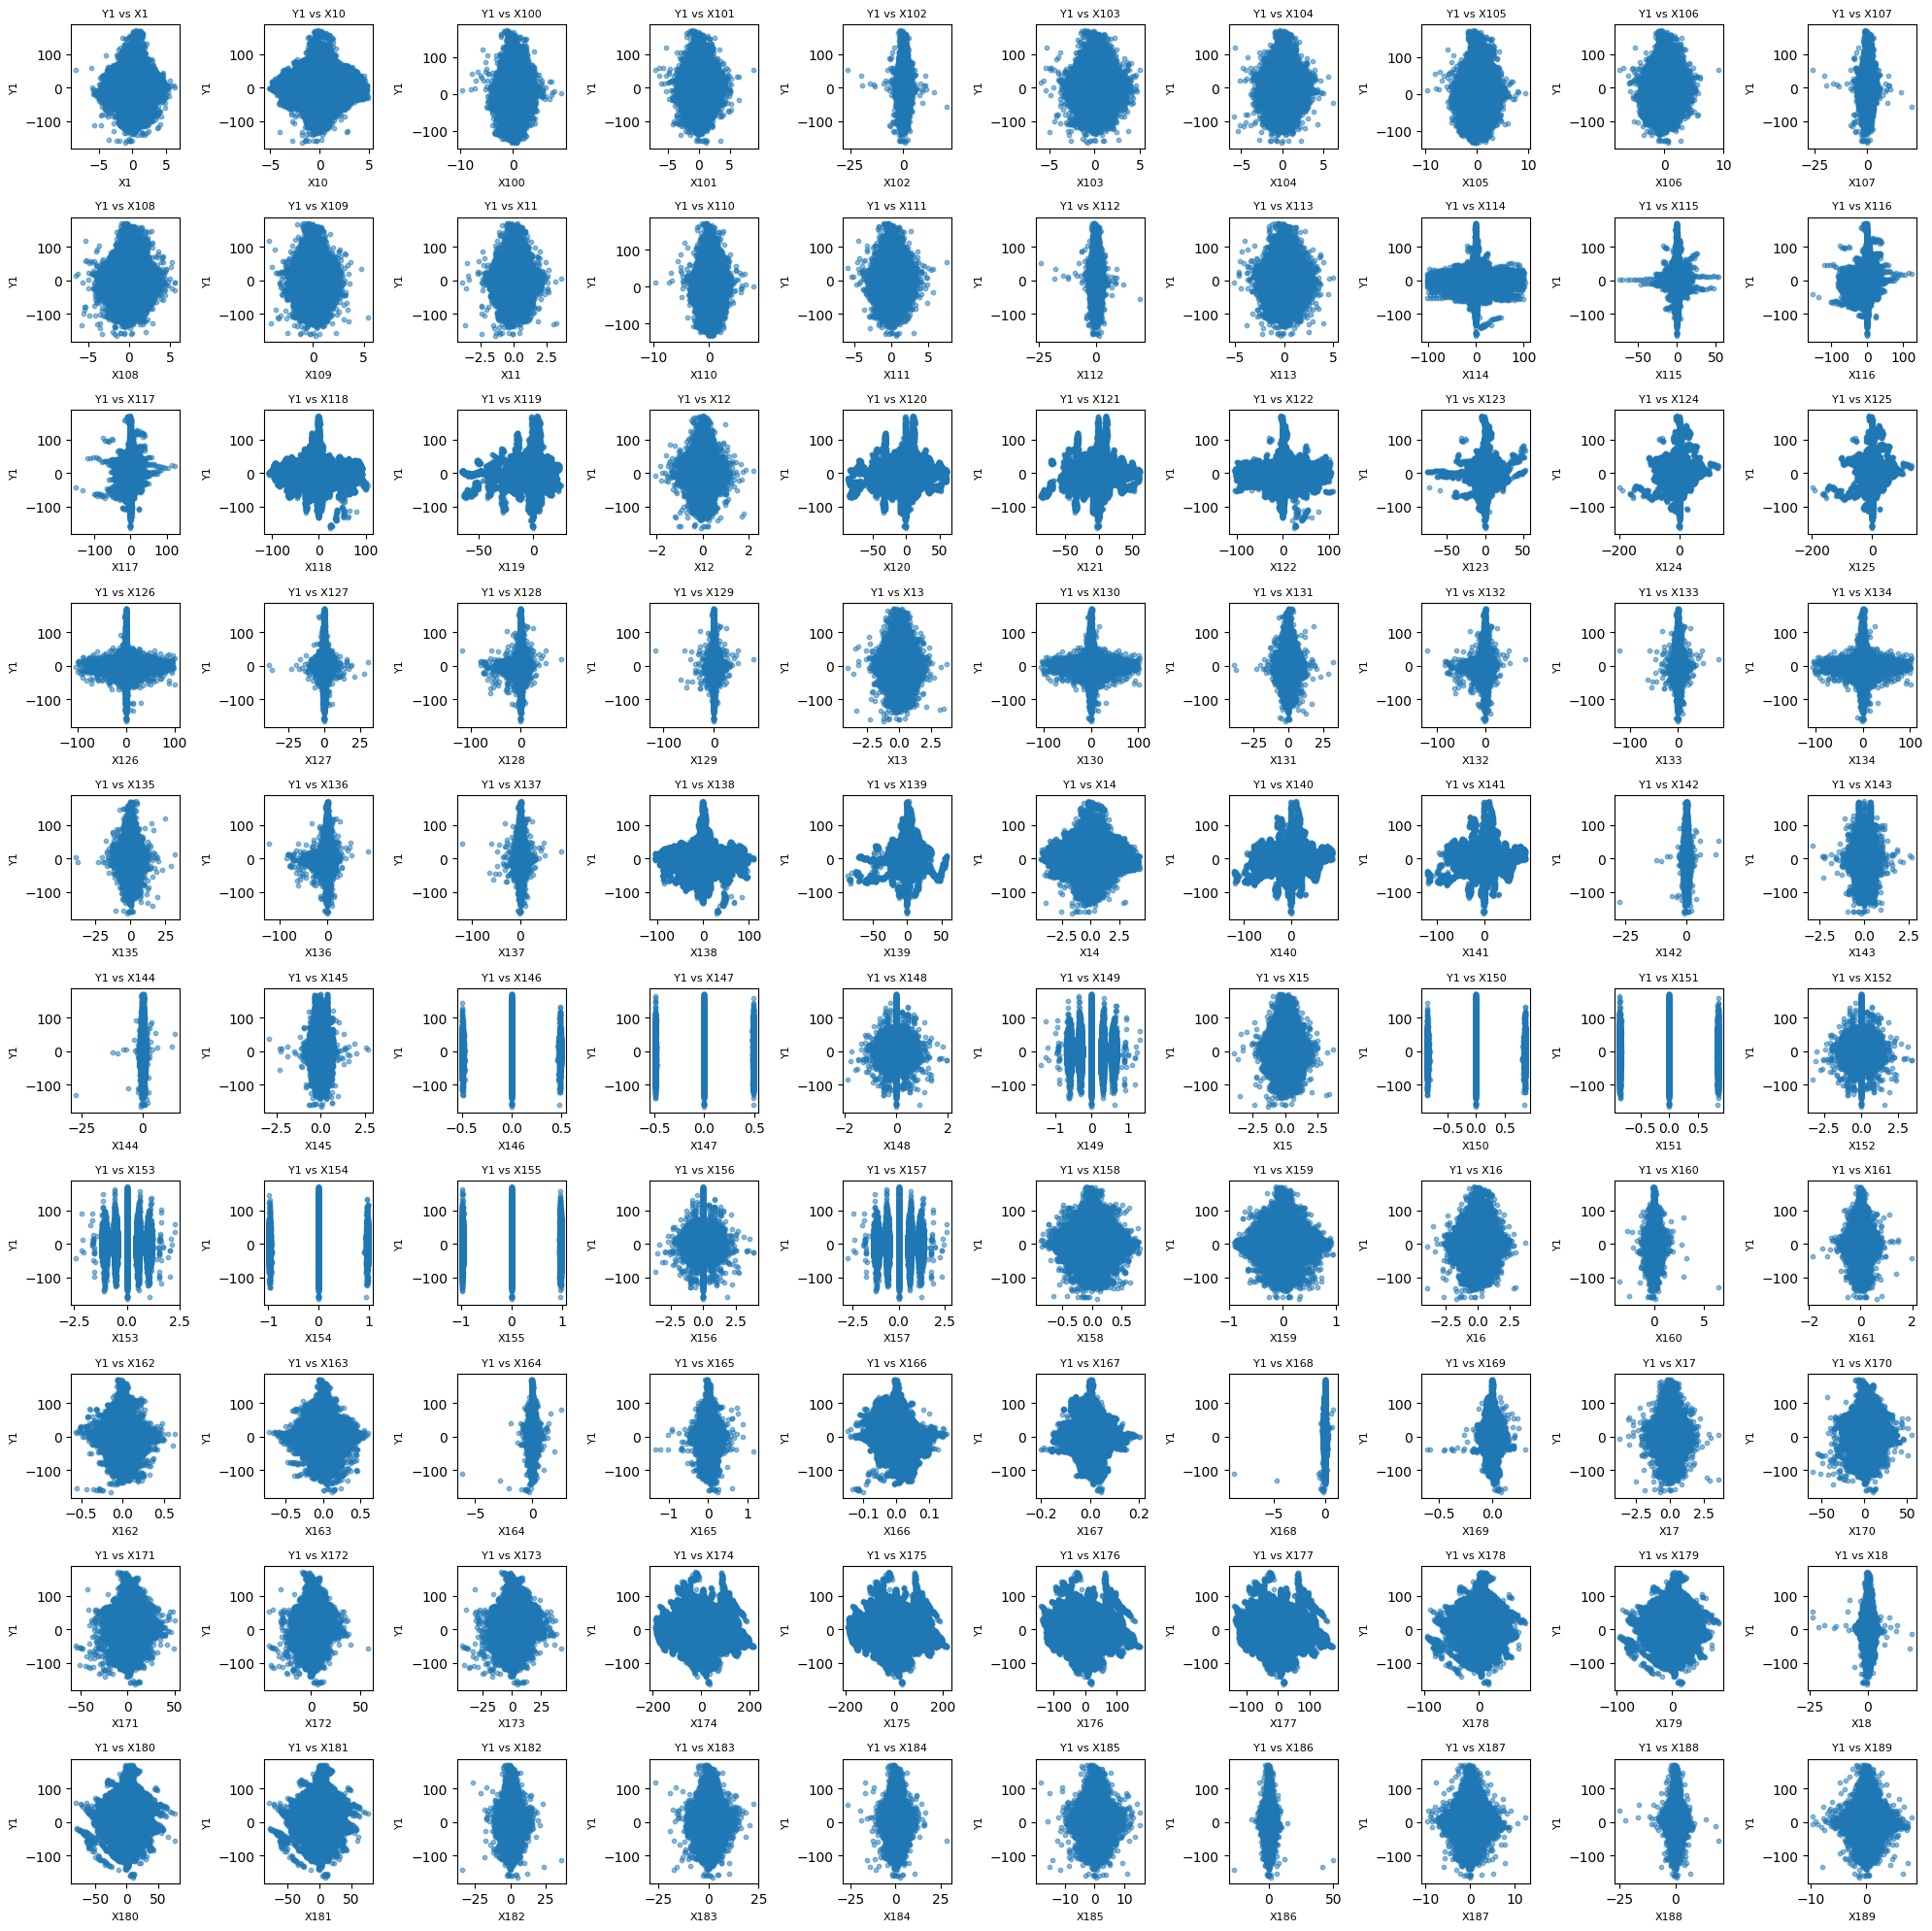

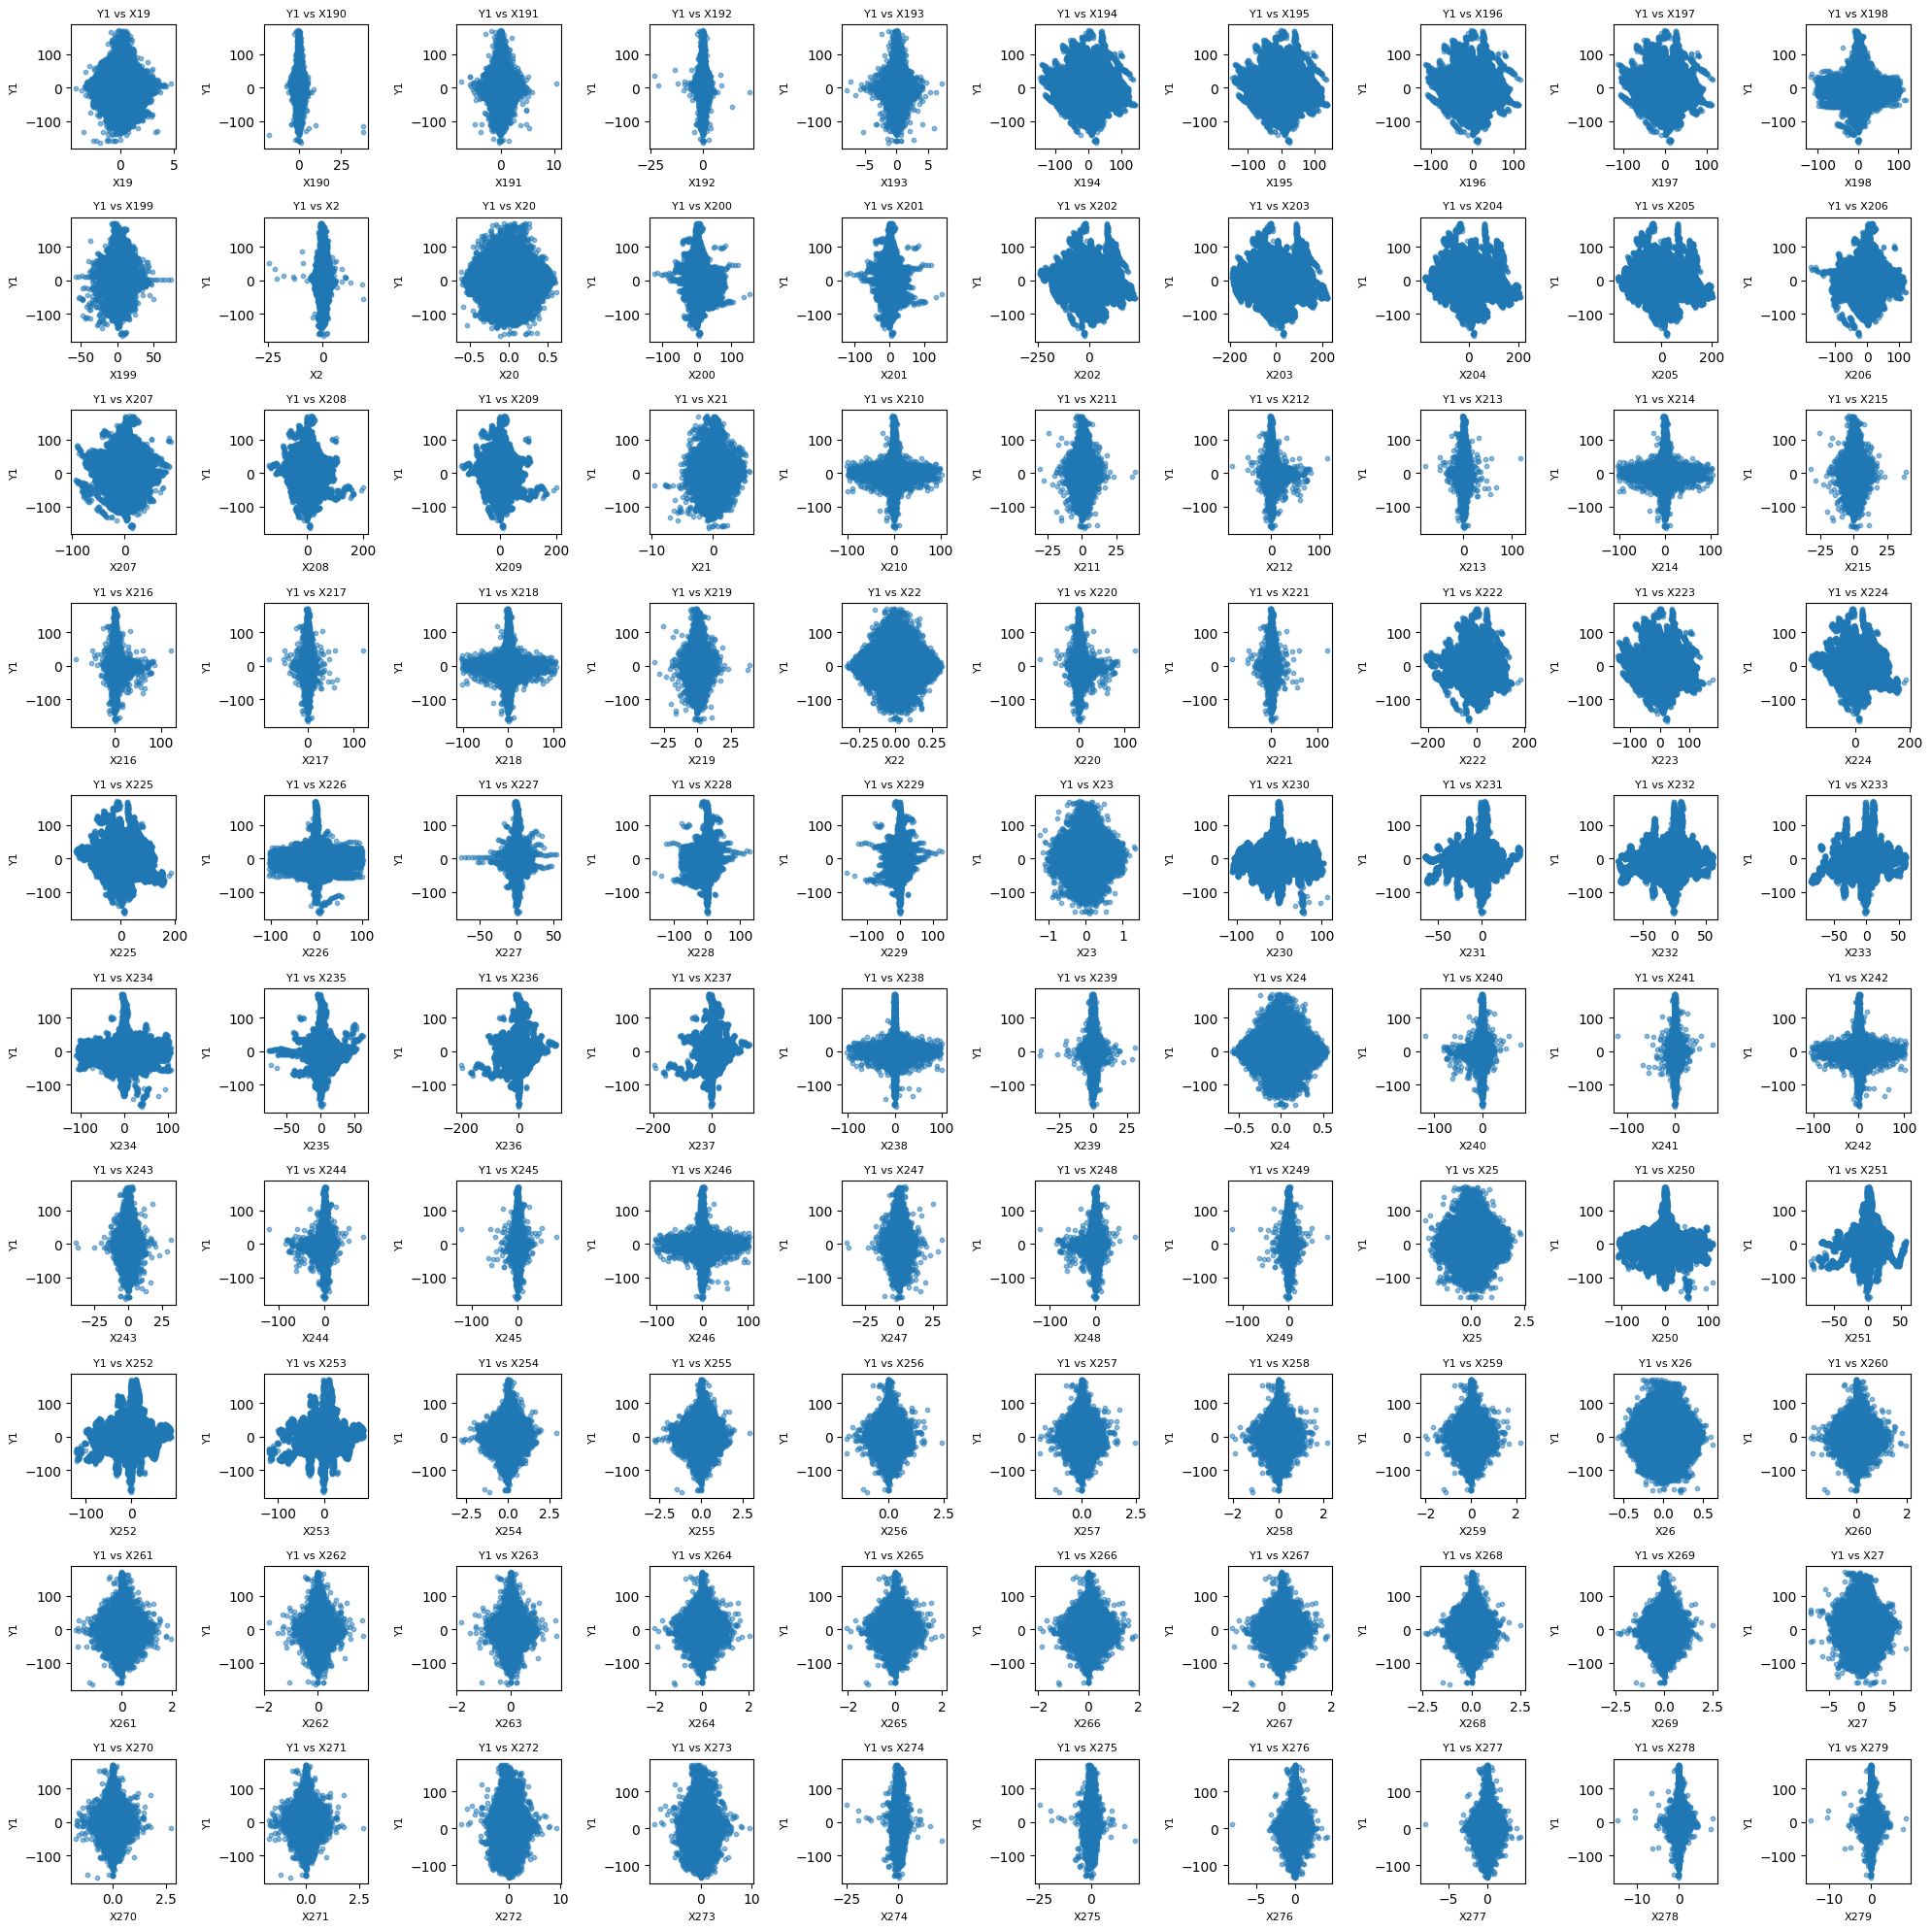

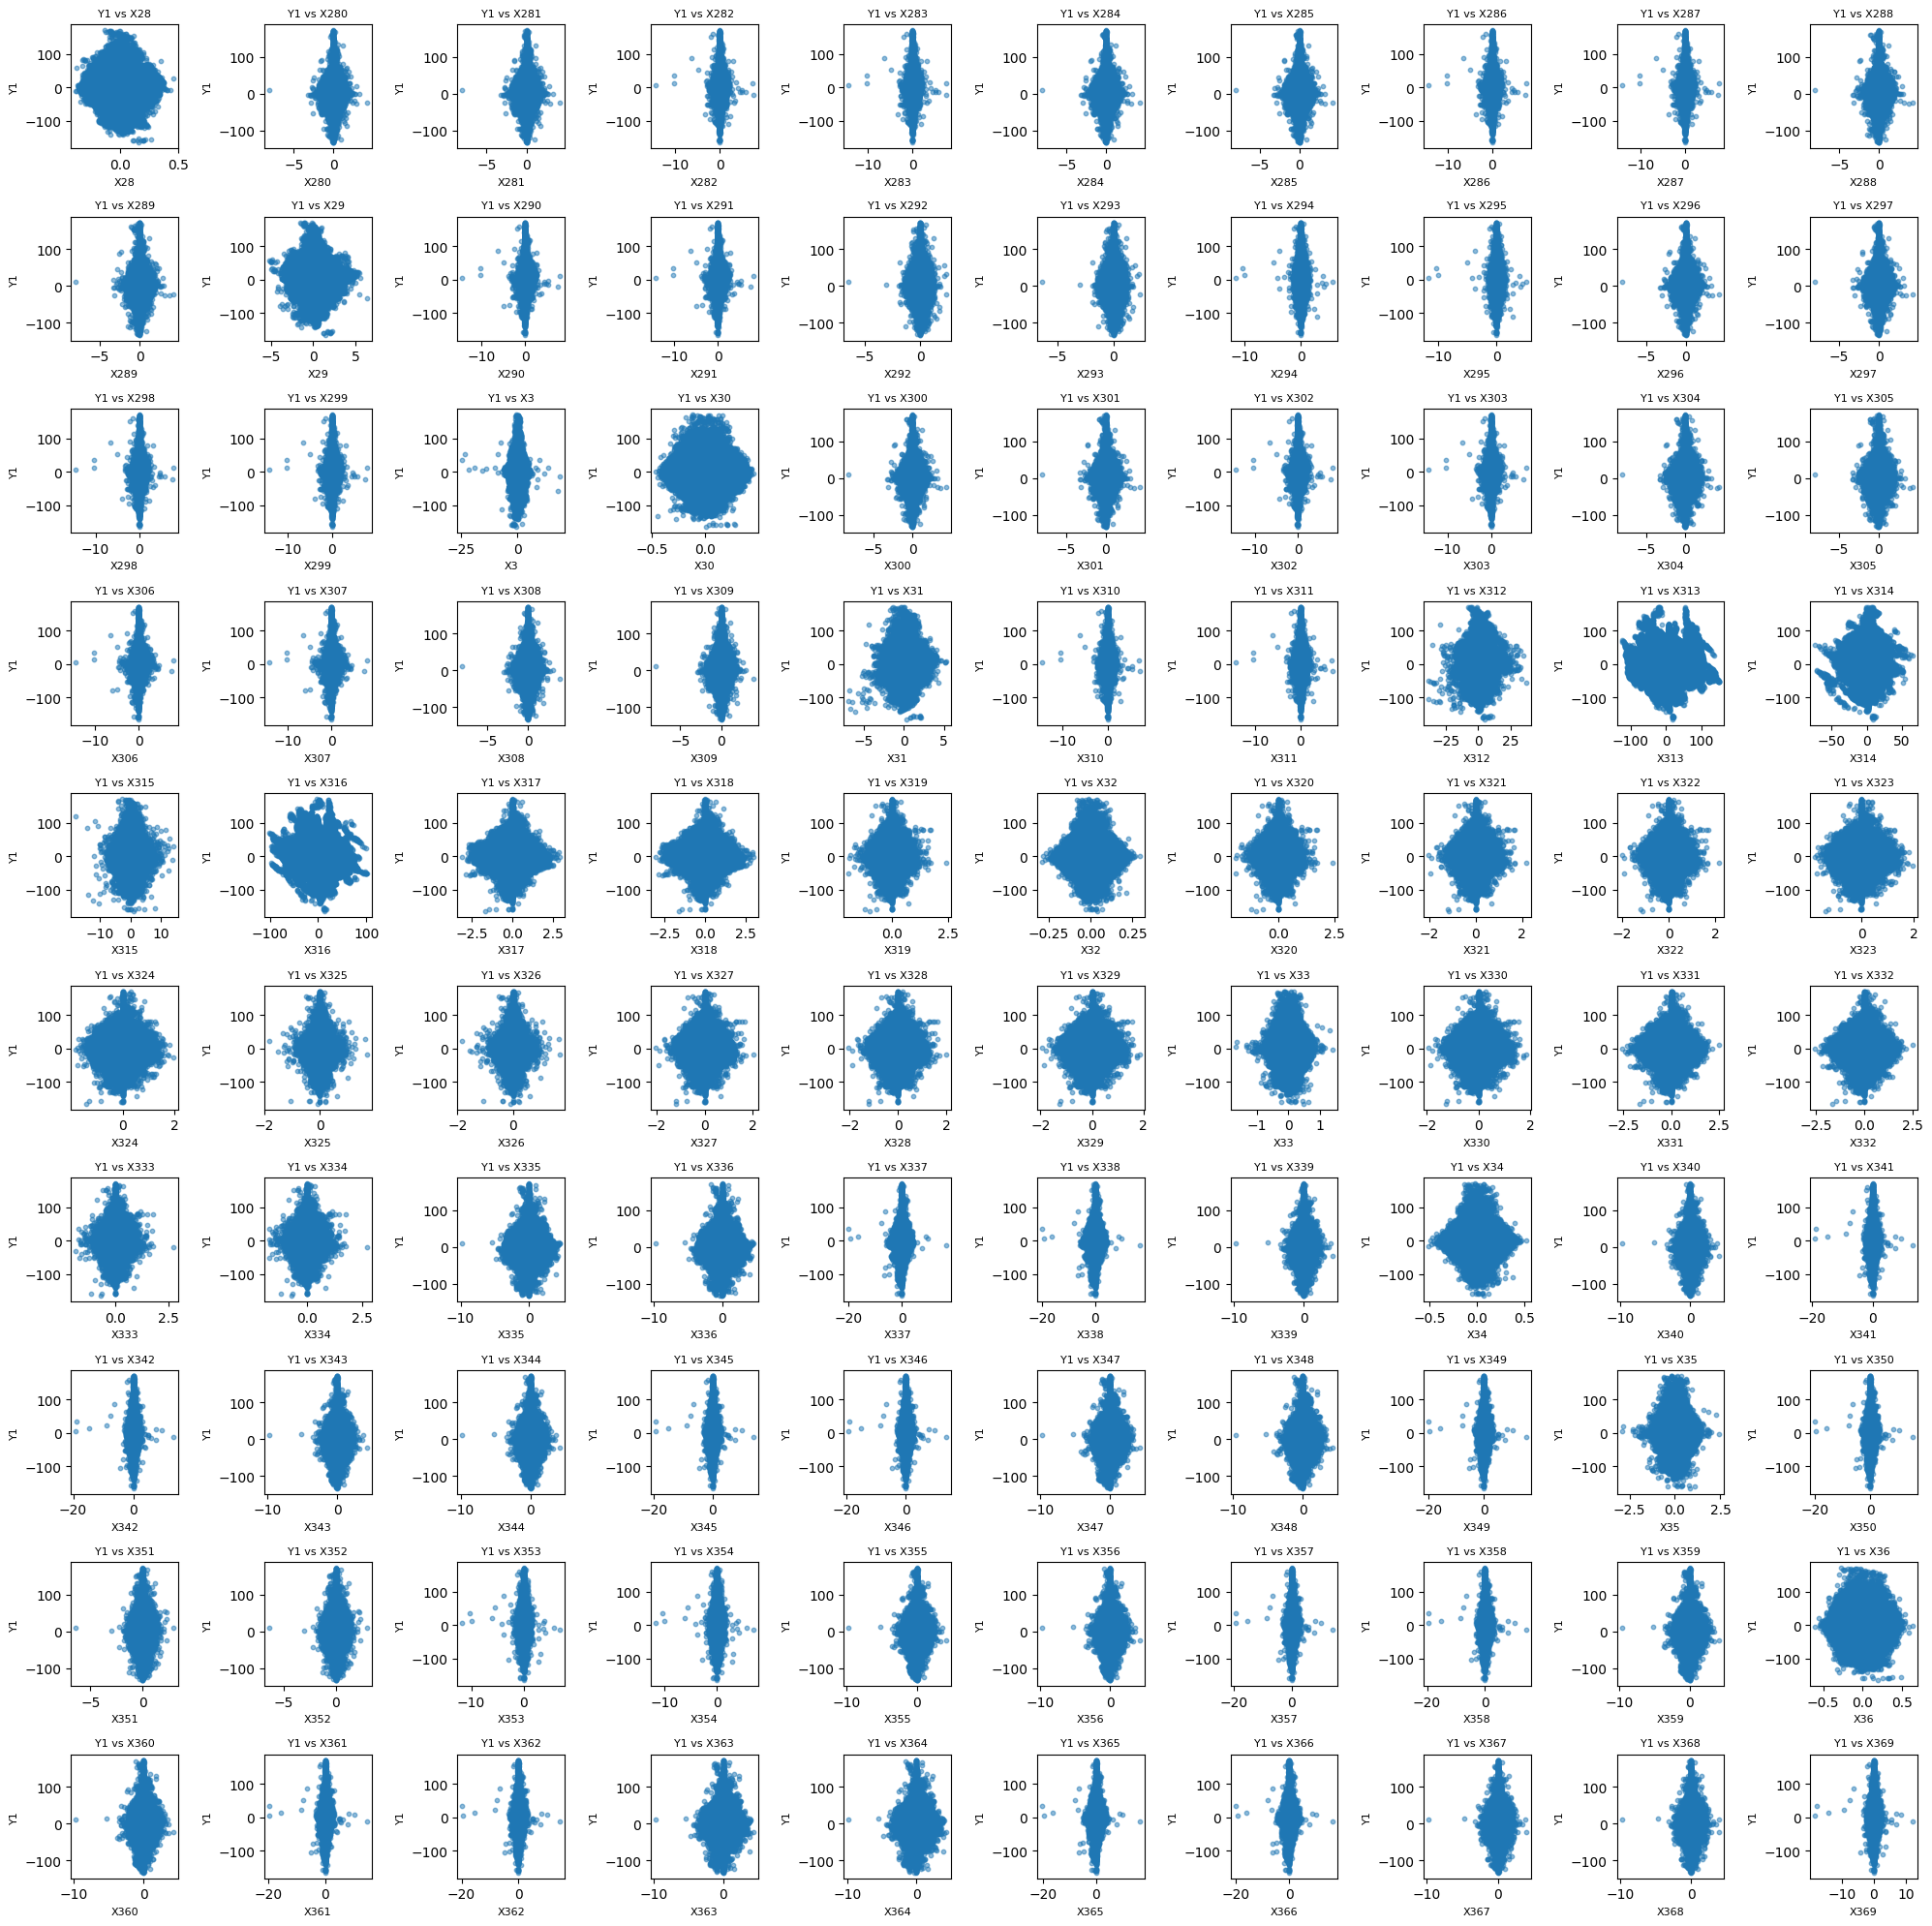

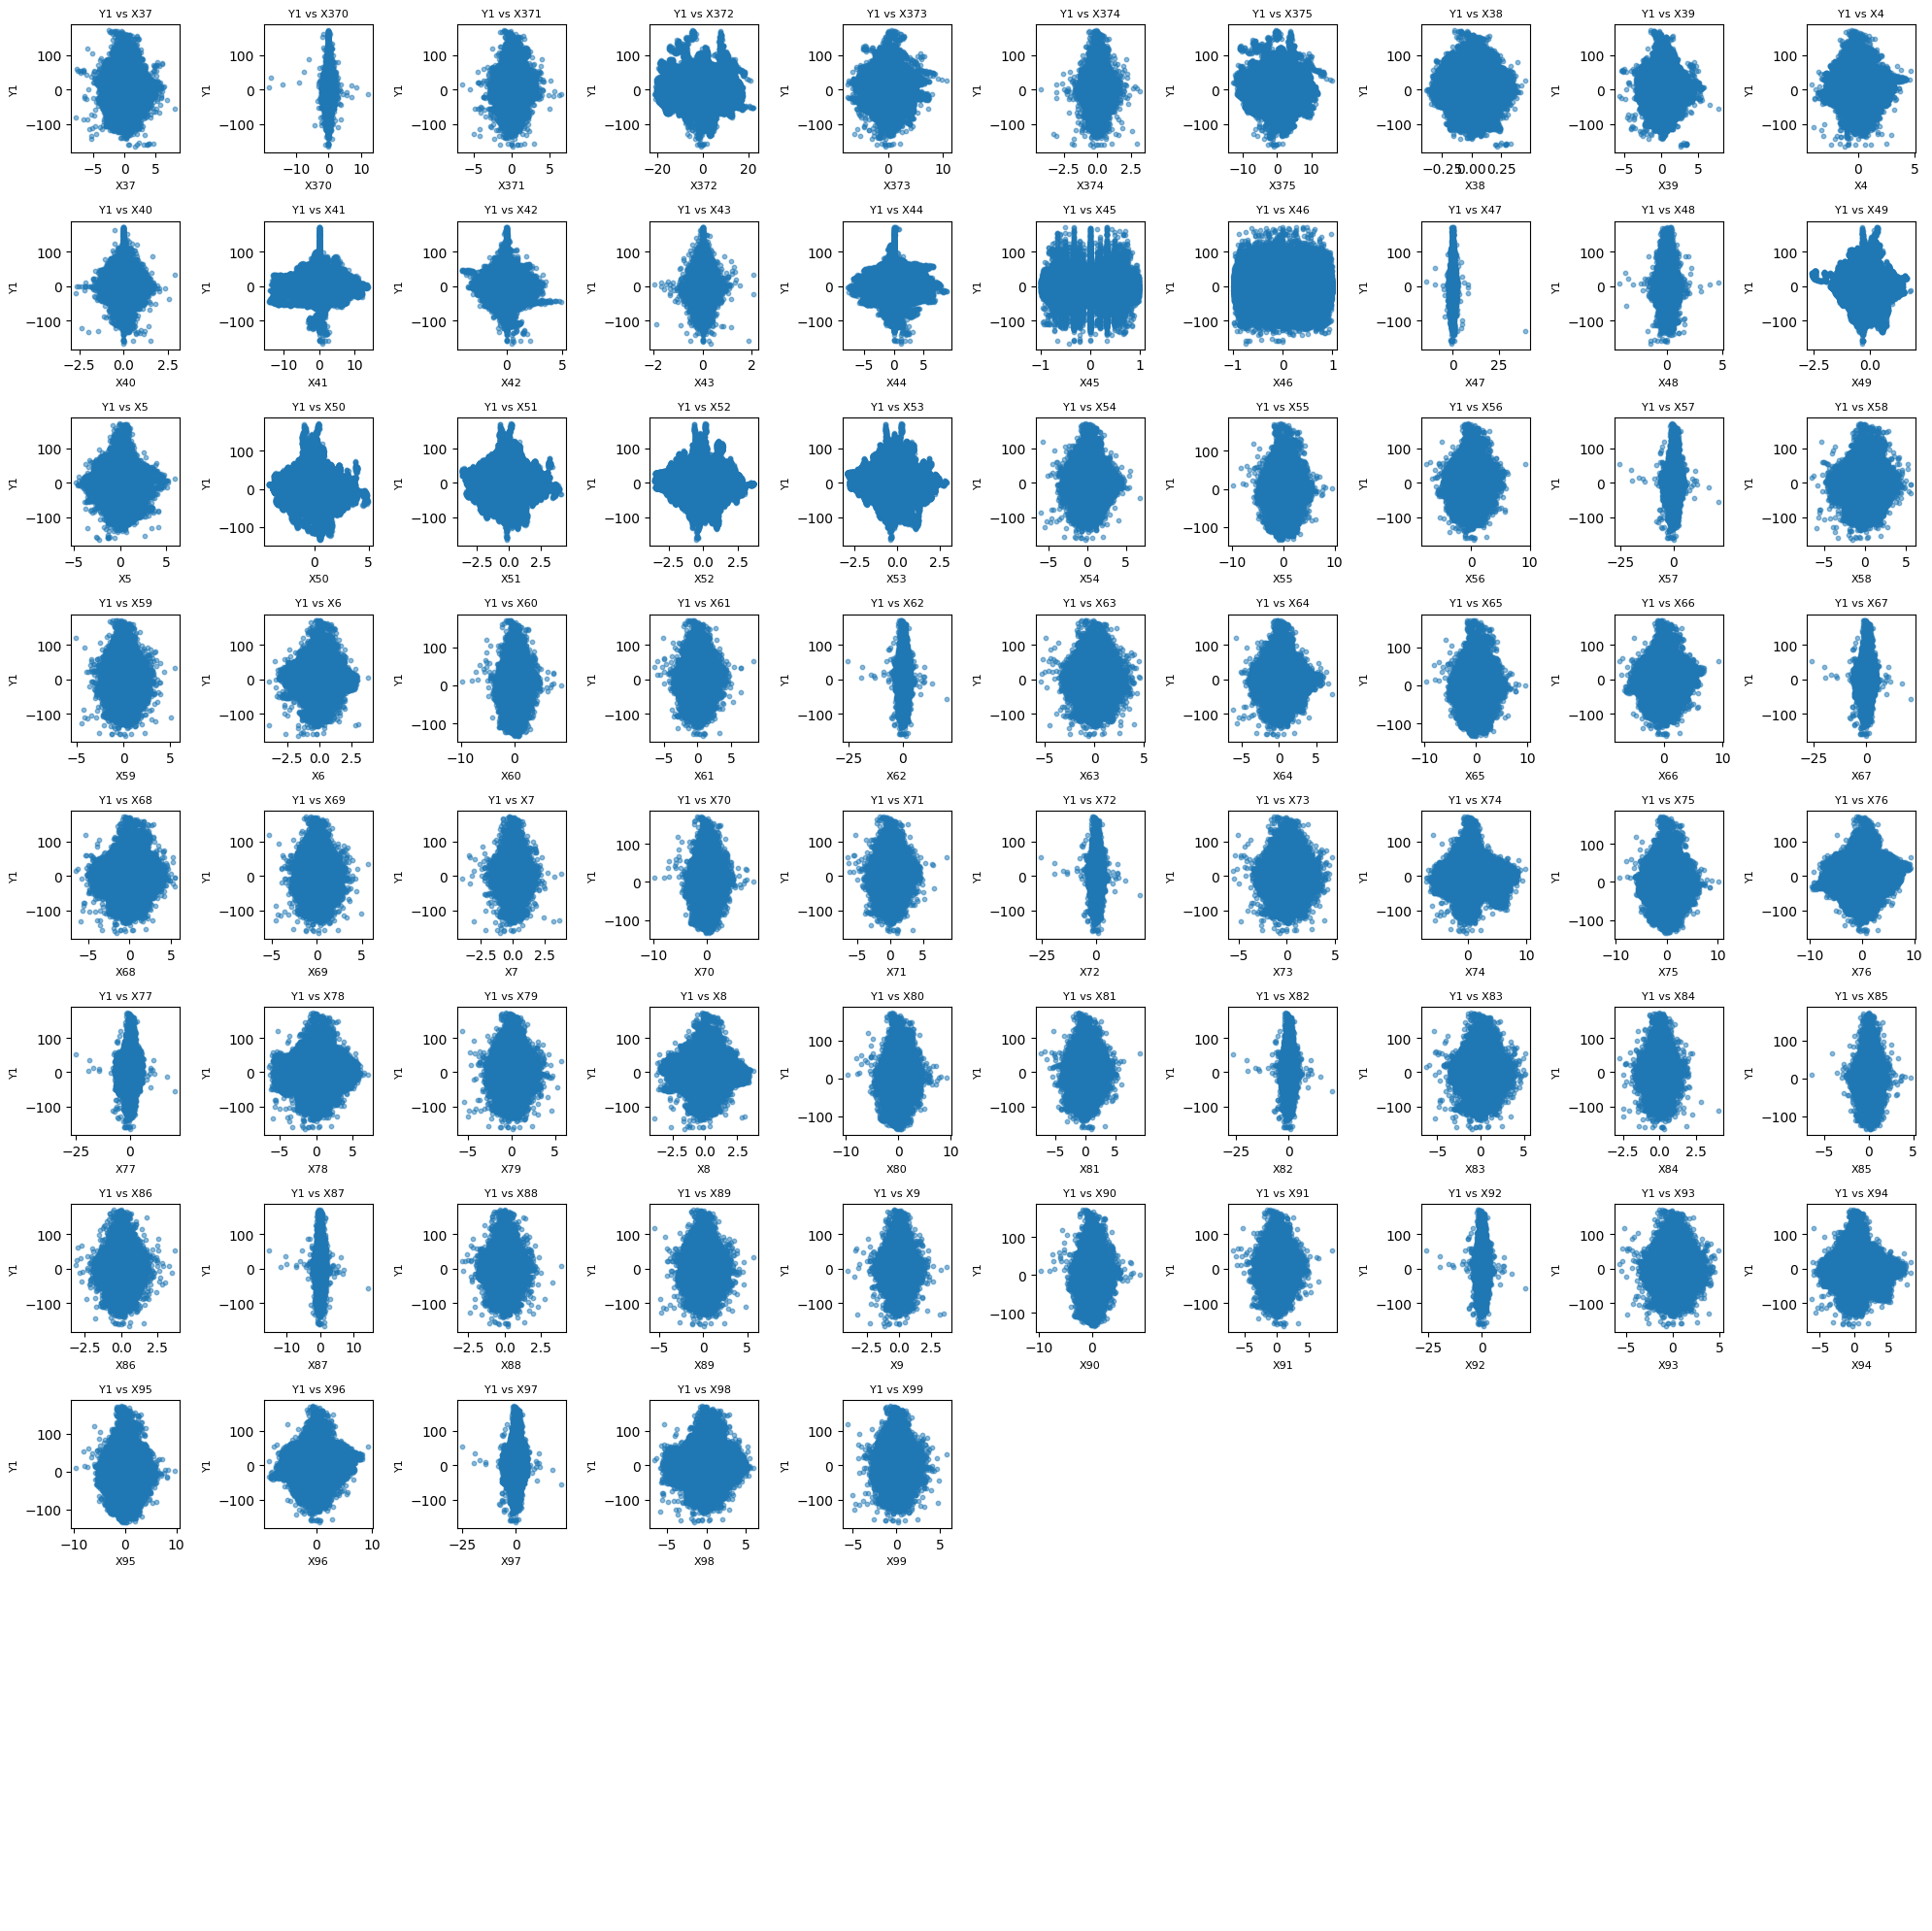

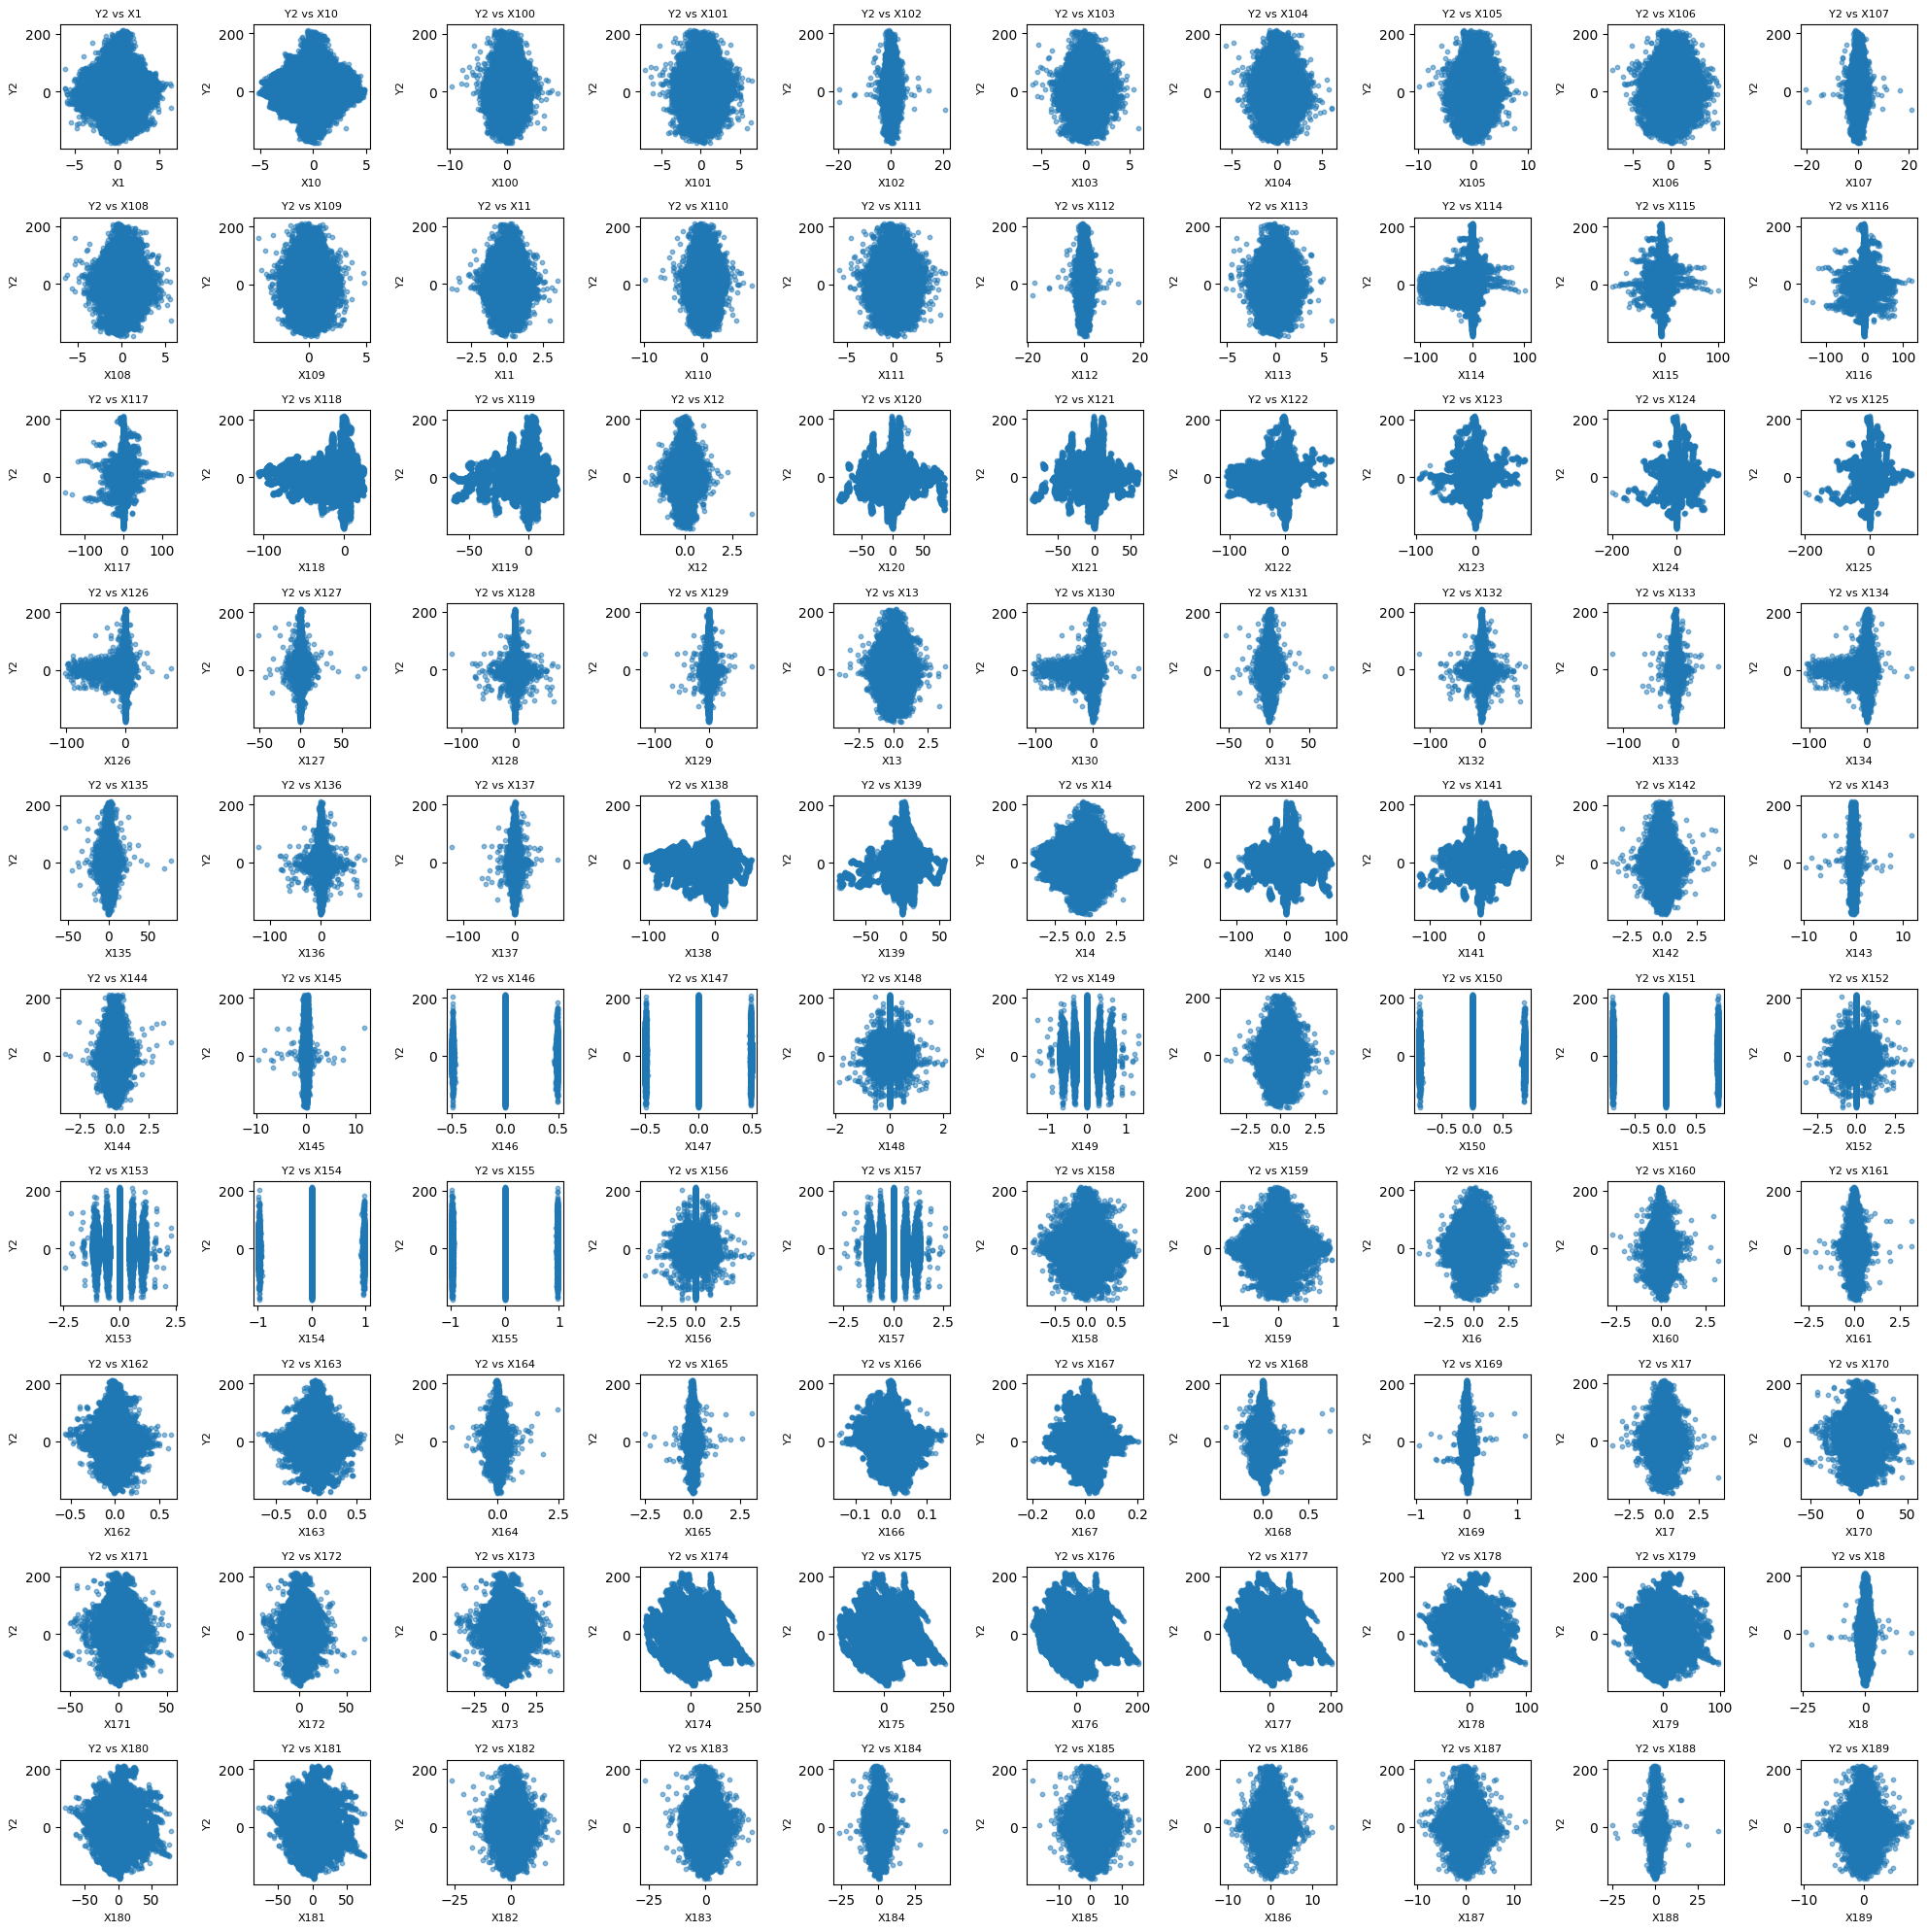

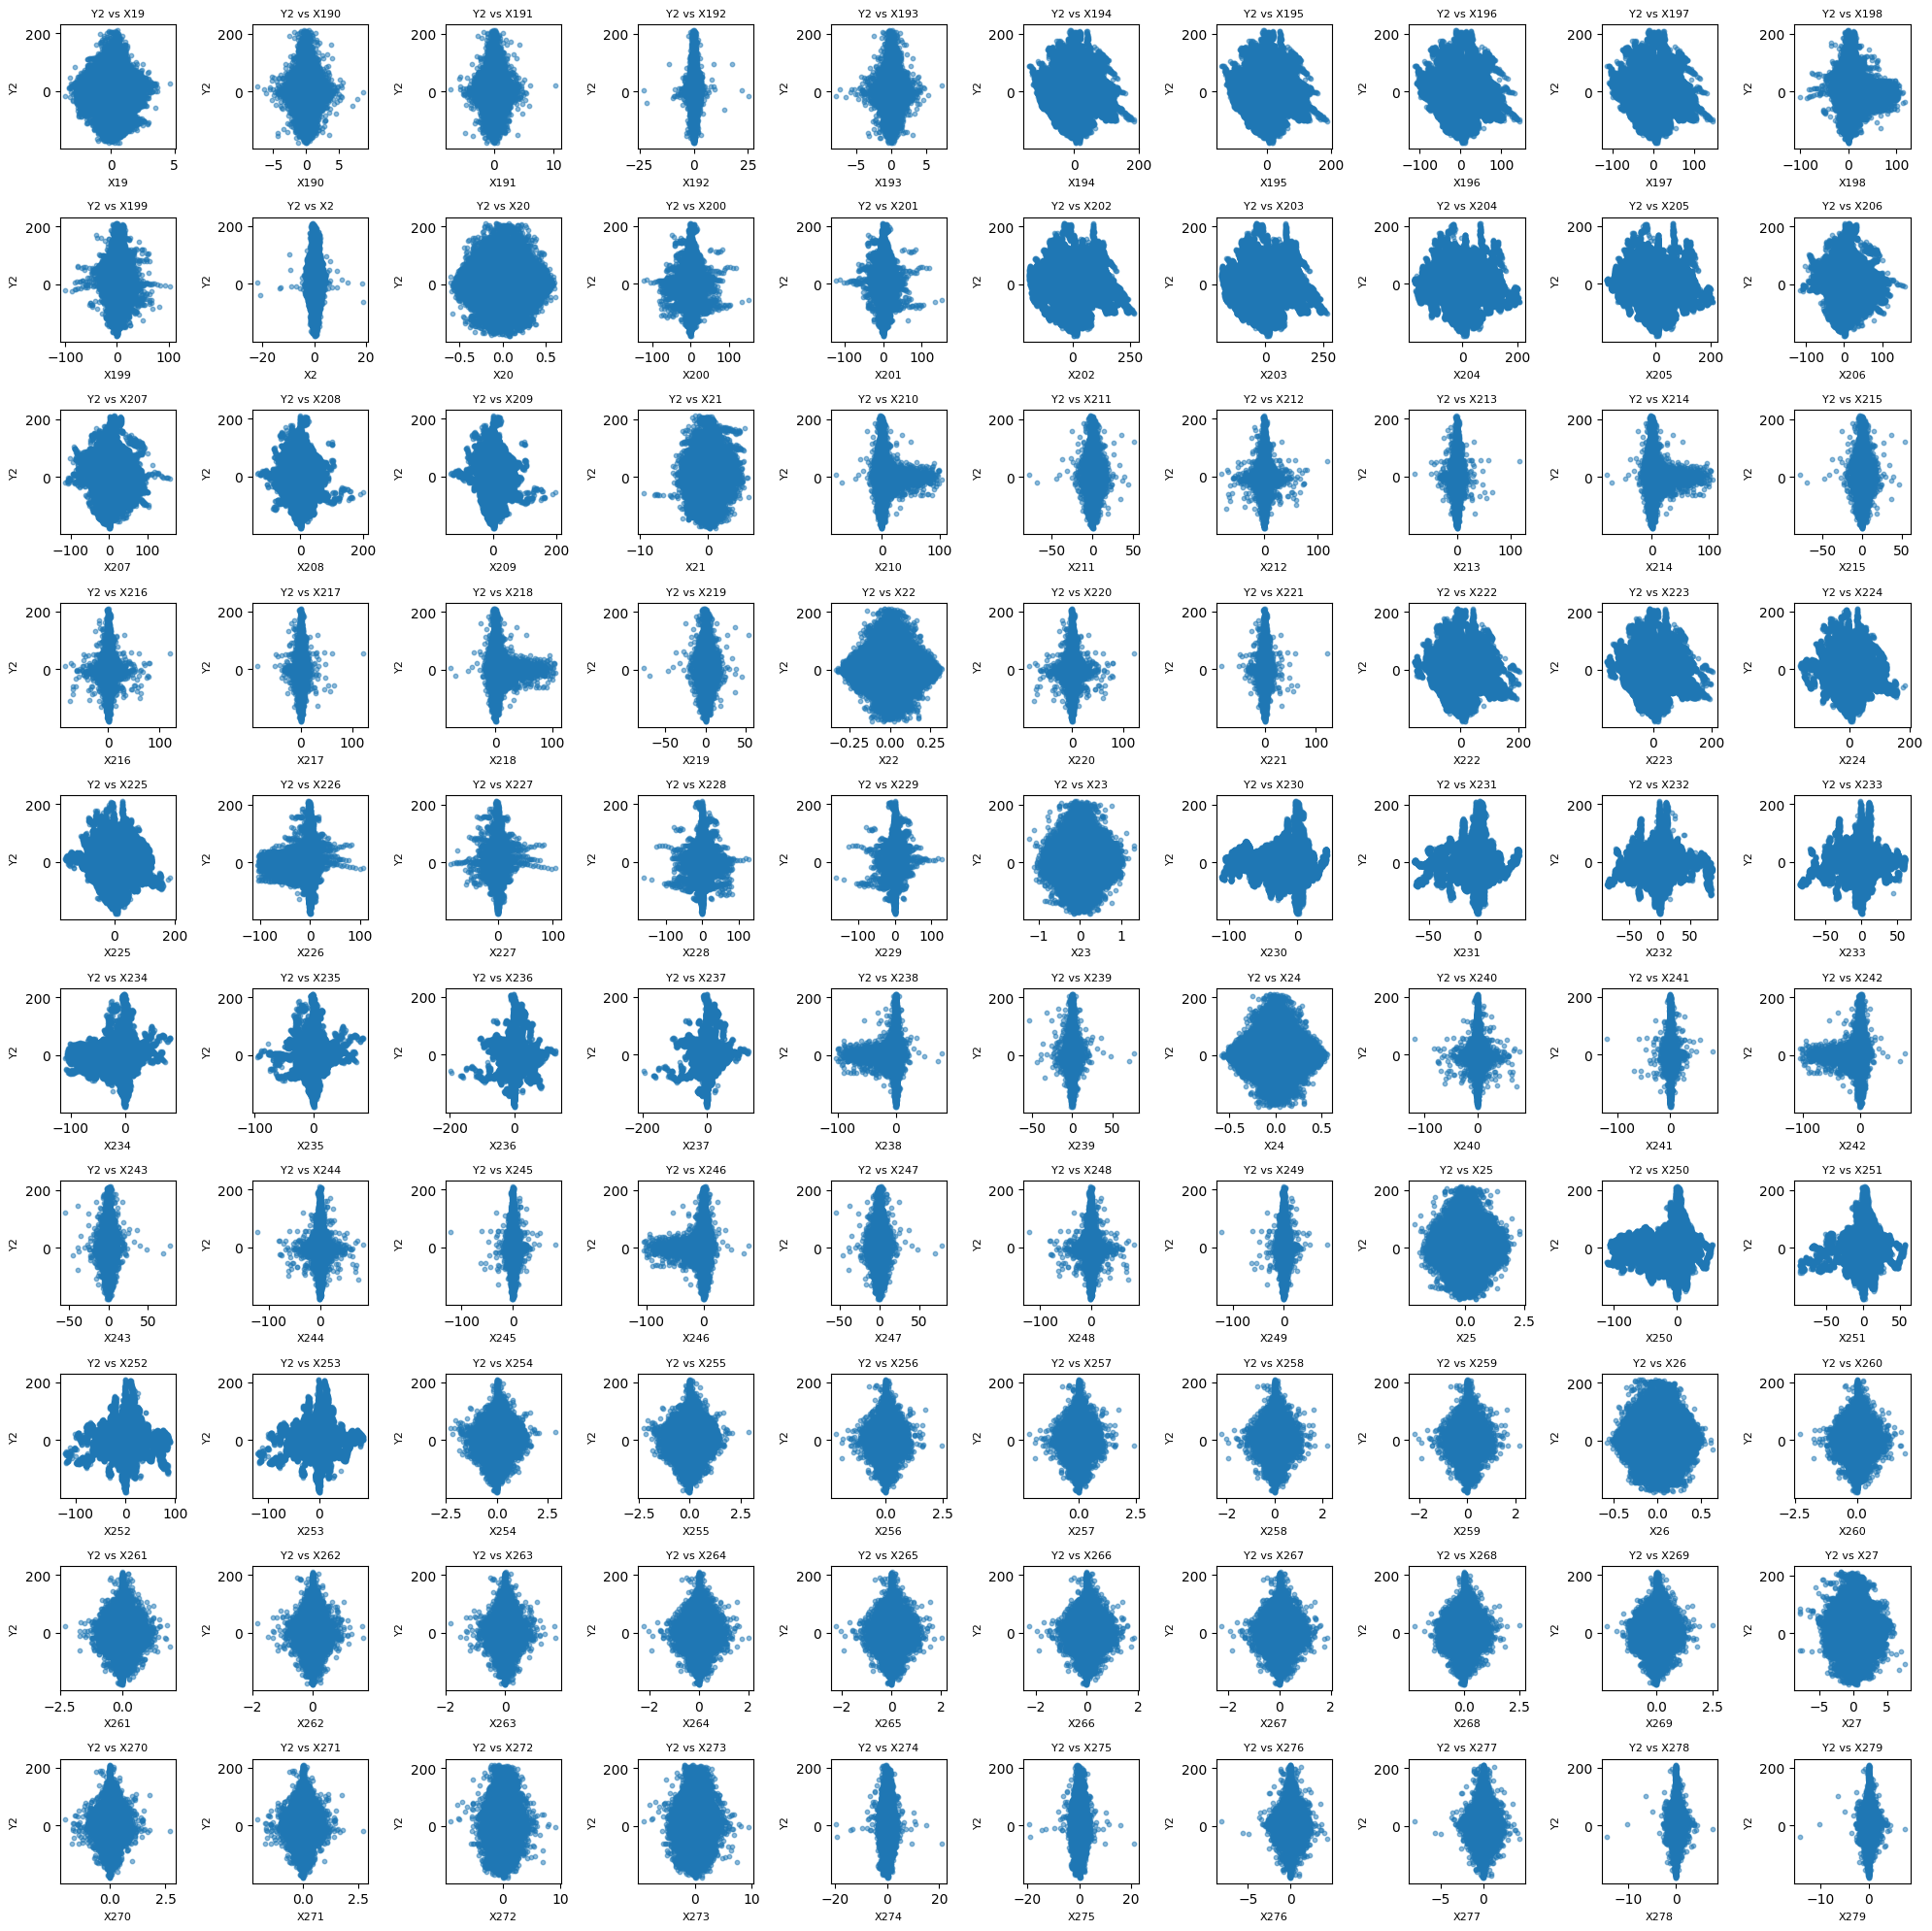

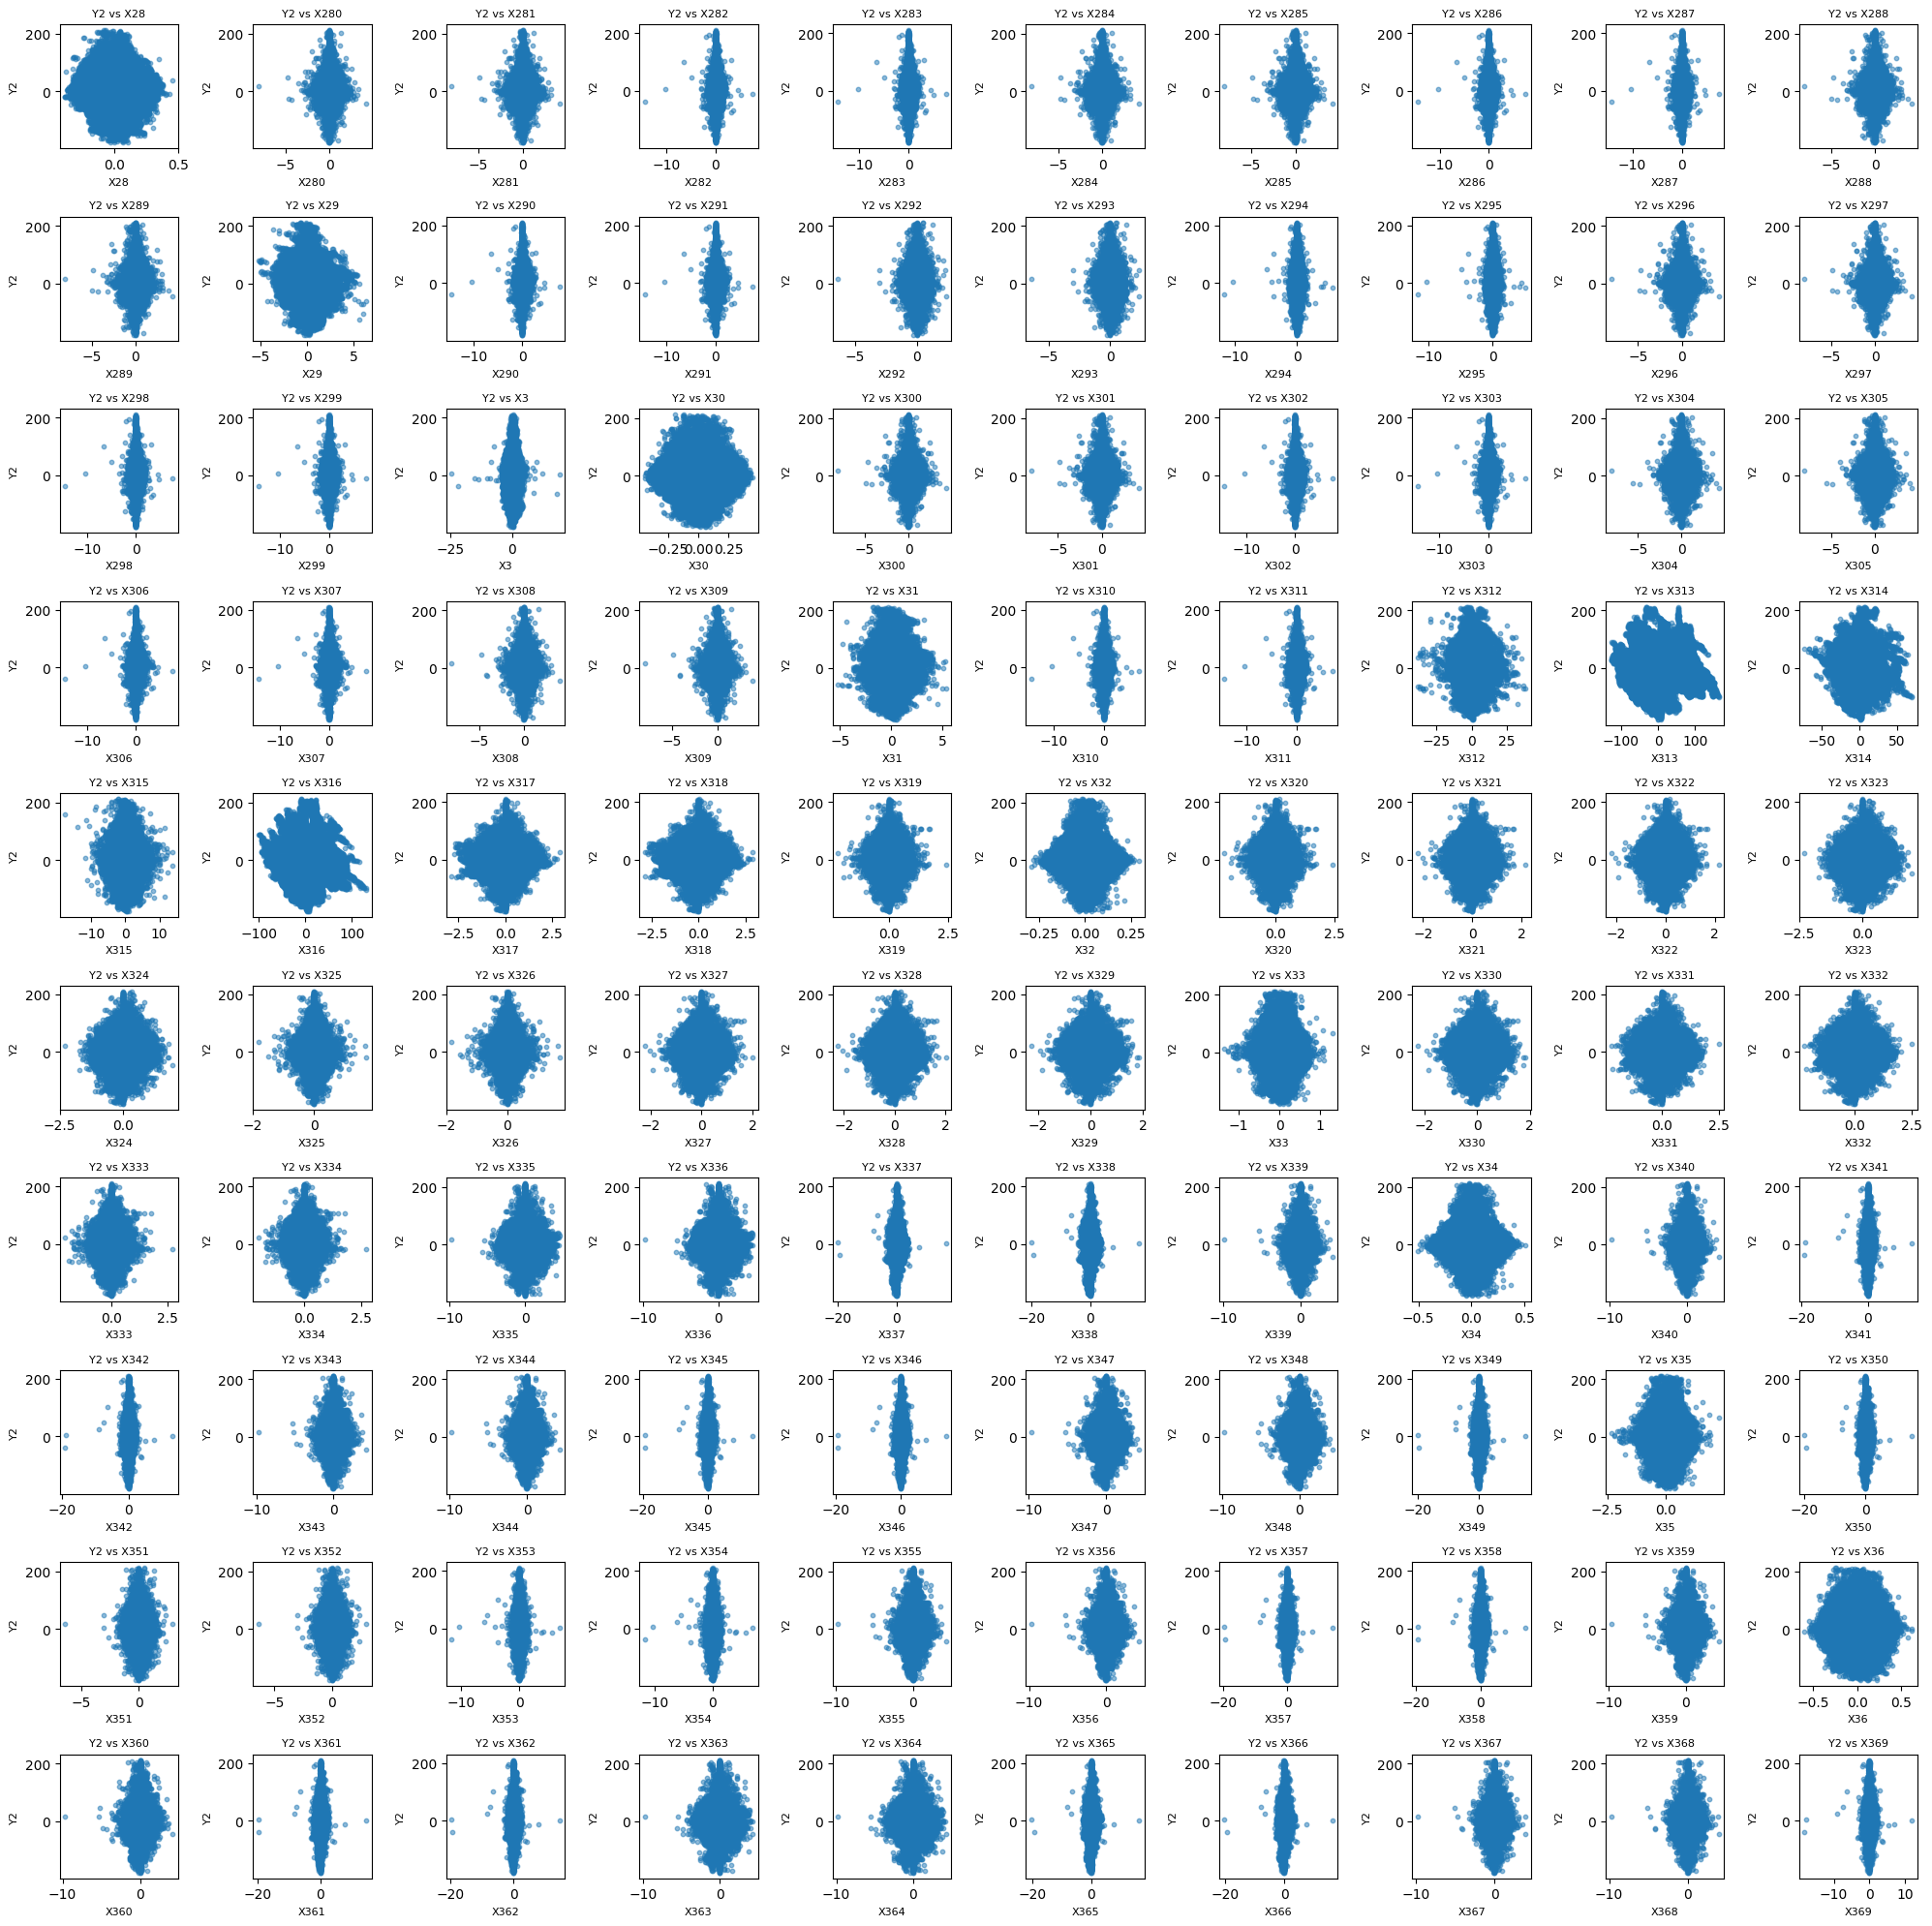

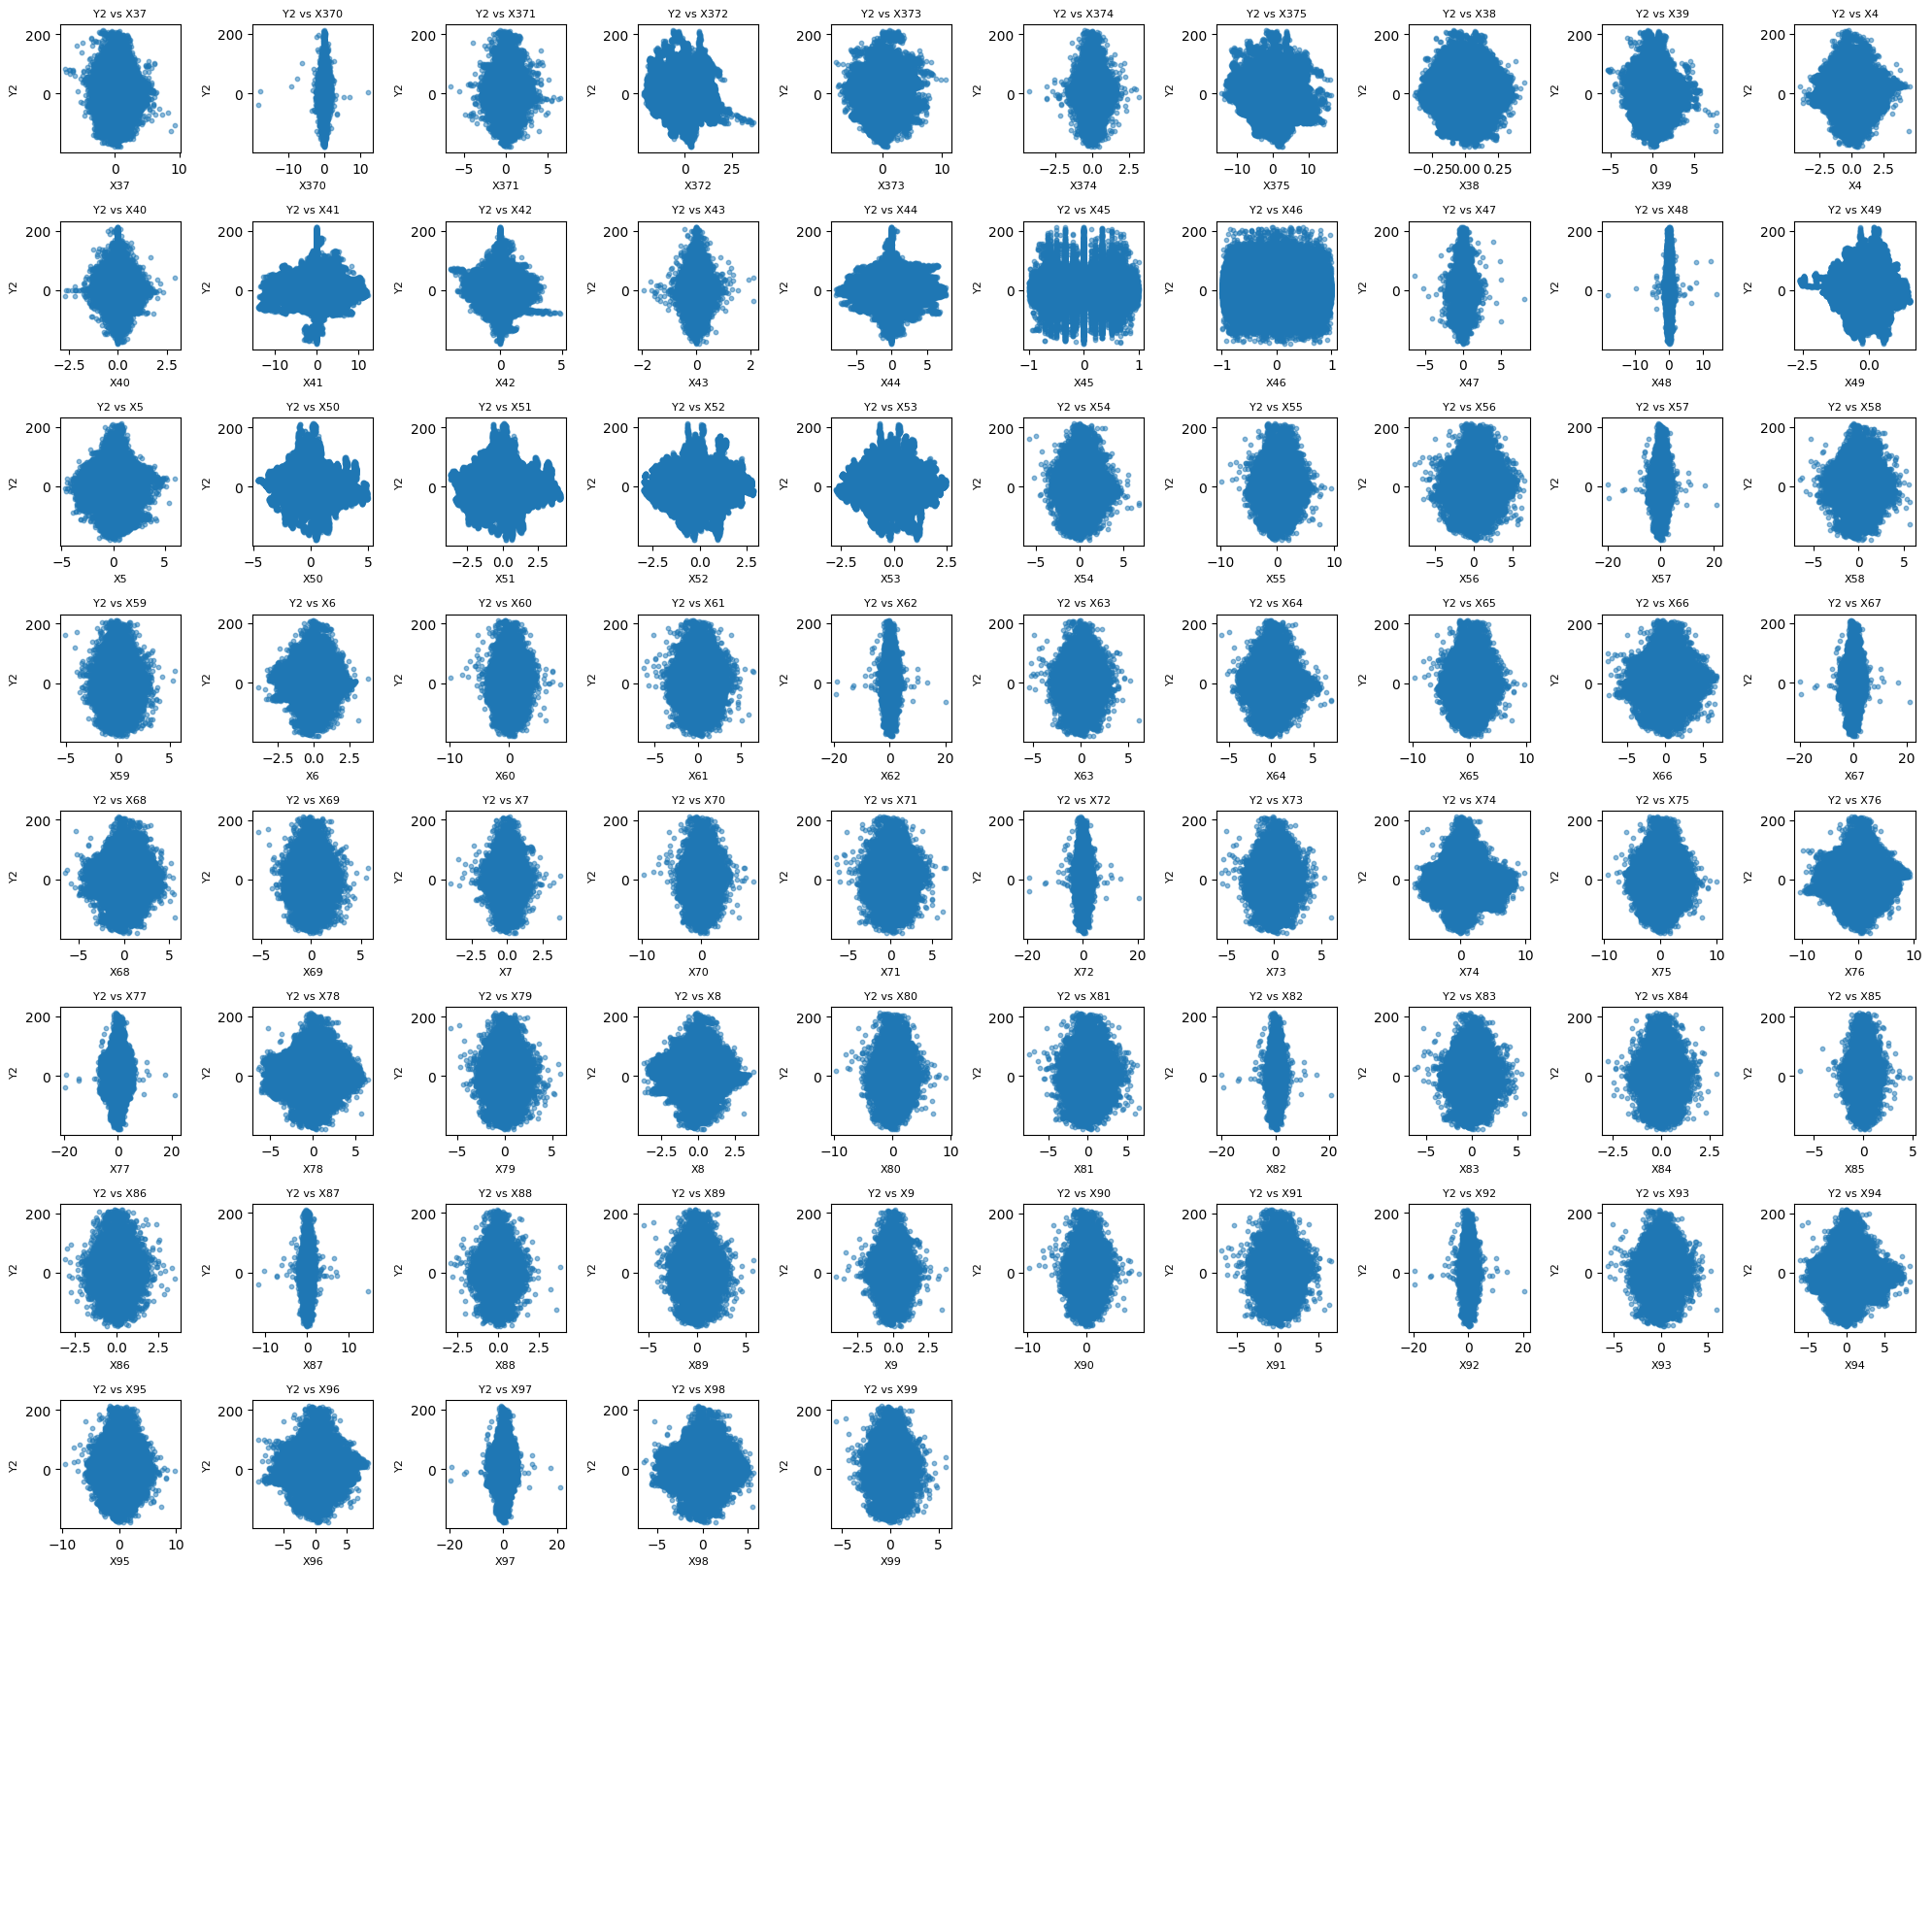

In [6]:
def plot_y_variable(data, output_base, y_variable):
    if y_variable == 'Y1':
        data.loc[data['Q1'] < 0.9999, y_variable] = pd.NA
    elif y_variable == 'Y2':
        data.loc[data['Q2'] < 0.9999, y_variable] = pd.NA
    # Extract column names starting with 'X' from the DataFrame
    parameters = [col for col in data.columns if col.startswith('X')]

    # Calculate the number of 10x10 plots needed to display all parameters
    num_parameters = len(parameters)
    plots_needed = int(np.ceil(num_parameters / 100.0))
    grid_size = 10

    # Iterate through each set of 100 parameters to create 10x10 subplots
    for plot_number in range(plots_needed):
        # Determine the parameters for this particular grid
        start_idx = plot_number * 100
        end_idx = min(start_idx + 100, num_parameters)
        parameters_subset = parameters[start_idx:end_idx]

        # Create the subplot grid
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))
        axes = axes.flatten()

        # Iterate over each parameter in the subset and create a scatter plot
        for i, column in enumerate(parameters_subset):
            ax = axes[i]
            ax.scatter(data[column], data[y_variable], alpha=0.5, s=10)
            ax.set_title(f'{y_variable} vs {column}', fontsize=8)
            ax.set_xlabel(column, fontsize=8)
            ax.set_ylabel(y_variable, fontsize=8)

        # Turn off any unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        # Save the plot before showing it
        plt.savefig(f'{output_base}_{y_variable}_plot_{plot_number + 1}.png')

        plt.show()

# Example usage for Y1 and Y2
plot_y_variable(in_sample_data, 'Plot n result save/in_sample_data', 'Y1')
plot_y_variable(in_sample_data, 'Plot n result save/in_sample_data', 'Y2')

